## Mini Project 2

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from datetime import datetime, date
import string
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\johnd\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Load given datasets

In [3]:
df_train = pd.read_csv('Consumer_Complaints_train.csv')
df_test = pd.read_csv('Consumer_Complaints_test.csv')
df1 = df_train.copy()
df2 = df_test.copy()

## Print top 5 records of train dataset:

In [4]:
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


## Print top 5 records of test dataset

In [5]:
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

## Print shape of train and test datasets 

In [6]:
print(df_train.shape)
print(df_test.shape)

(358810, 18)
(119606, 17)


## Print columns of train and test datasets

In [7]:
print(df_train.columns)
print(df_test.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


## Check data type for both datasets

In [8]:
datatypes_df_train = pd.DataFrame(df_train.dtypes, columns=['Train'])
datatypes_df_test = pd.DataFrame(df_test.dtypes, columns=['Test'])
datatypes_df = pd.concat([datatypes_df_train, datatypes_df_test], axis=1)
datatypes_df

,Train,Test
Date received,object,object
Product,object,object
Sub-product,object,object
Issue,object,object
Sub-issue,object,object
Consumer complaint narrative,object,object
Company public response,object,object
Company,object,object
State,object,object
ZIP code,object,object


## Print missing values in percentage

In [9]:
missing_train = pd.DataFrame((df_train.isna().sum()/len(df_train))*100, columns=['Train'])
#missing_train
missing_test = pd.DataFrame((df_test.isna().sum()/len(df_test))*100, columns=['Test'])
#missing_test
missing_values_df = pd.concat([missing_train, missing_test], axis=1)
missing_values_df

,Train,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Sub-product,28.925058,28.997709
Issue,0.000000,0.000000
Sub-issue,61.139322,61.242747
Consumer complaint narrative,84.342688,84.186412
Company public response,81.067696,81.221678
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406


## Drop columns where more than 25% of the data are missing.

In [10]:
# Dropping 25% of missing value data straight from the datasets:
df_train = df_train.dropna(thresh=len(df_train)*0.75, axis=1)
df_test = df_test.dropna(thresh=len(df_test)*0.75, axis=1)

In [11]:
nanfree_df_train = pd.DataFrame((df_train.isna().sum()/len(df_train))*100, columns=['Train'])
#nanfree_df_train
nanfree_df_test = pd.DataFrame((df_test.isna().sum()/len(df_test))*100, columns=['Test'])
#nanfree_df_test
nanfree_df = pd.concat([nanfree_df_train, nanfree_df_test], axis=1)
nanfree_df

,Train,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Issue,0.000000,0.000000
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406
Submitted via,0.000000,0.000000
Date sent to company,0.000000,0.000000
Company response to consumer,0.000000,0.000000
Timely response?,0.000000,0.000000


### Now, we can observe that there are no more than 25% missing values in our datasets.

## Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [12]:
df_train['Year Received'] = pd.to_datetime(df_train['Date received']).dt.year
df_train['Month Received'] = pd.to_datetime(df_train['Date received']).dt.month
df_train['Day Received'] = pd.to_datetime(df_train['Date received']).dt.day
df_train.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year Received,Month Received,Day Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26


In [13]:
df_test['Year Received'] = pd.to_datetime(df_test['Date received']).dt.year
df_test['Month Received'] = pd.to_datetime(df_test['Date received']).dt.month
df_test['Day Received'] = pd.to_datetime(df_test['Date received']).dt.day
df_test.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year Received,Month Received,Day Received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22


## Convert dates from object type to datetime type

In [14]:
#training set:
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
#testing set:
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

#print(df_train.info())
#print(df_test.info())

## Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [15]:
df_train['Days Held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days Held'] = df_test['Date sent to company'] - df_test['Date received']

## Convert "Days Held" to Int(above column)

In [16]:
df_train['Days Held']= df_train['Days Held'].astype('timedelta64[D]').astype(int)
df_test['Days Held']= df_test['Days Held'].astype('timedelta64[D]').astype(int)

##  Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [17]:
df_train.drop(["Date received","Date sent to company","ZIP code", "Complaint ID"], axis=1, inplace=True)
df_test.drop(["Date received","Date sent to company","ZIP code", "Complaint ID"], axis=1, inplace=True)

In [18]:
df_train.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Year Received', 'Month Received', 'Day Received',
       'Days Held'],
      dtype='object')

In [19]:
df_test.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'Year Received',
       'Month Received', 'Day Received', 'Days Held'],
      dtype='object')

## Impute null values in "State" by Mode 
    (find mode and replace nan value)

In [20]:
print(df_train['State'].mode())
print(df_test['State'].mode())
df_train['State'] = df_train['State'].replace(np.nan,'CA')
df_test['State']  = df_test['State'].replace(np.nan,'CA')

0    CA
Name: State, dtype: object
0    CA
Name: State, dtype: object


## Check Missing Values in the dataset

In [21]:
print(df_train.isna().sum())

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year Received                   0
Month Received                  0
Day Received                    0
Days Held                       0
dtype: int64


In [22]:
print(df_test.isna().sum())

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year Received                   0
Month Received                  0
Day Received                    0
Days Held                       0
dtype: int64


## Categorize Days into Weeks with the help of 'Days Received'

In [23]:
week_train = []
for i in df_train['Day Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >= 16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week Received'] = week_train

week_test = []
for i in df_test['Day Received']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >= 16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week Received'] = week_test

## Drop "Day_Received" column

In [24]:
df_train = df_train.drop('Day Received', axis=1)
df_test = df_test.drop('Day Received', axis=1)

## Print head of train and test dataset and observe

In [25]:
# train dataset:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year Received,Month Received,Days Held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,4


In [26]:
#test dataset:
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year Received,Month Received,Days Held,Week Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,1


## Store data of the disputed consumer in the new data frame as "disputed_cons"

In [27]:
disputed_cons = df_train[df_train['Consumer disputed?']=='Yes']
disputed_cons.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year Received,Month Received,Days Held,Week Received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,4


## Plot bar graph for the total no of disputes with the help of seaborn

Text(0.5, 1.0, 'Total Number of disputes')

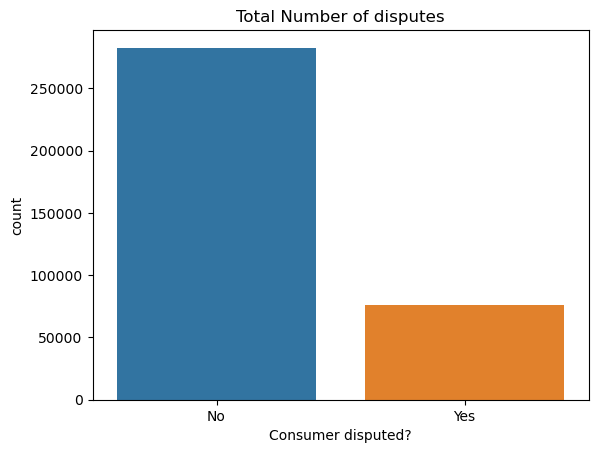

In [28]:
sns.countplot(x='Consumer disputed?',data=df_train)
plt.title('Total Number of disputes')

###    We observed that only about 21% of Customers have disputed.

Here, is the exact total number of disputes in each group:
df_train['Consumer disputed?'].value_counts()/len(df_train['Consumer disputed?'])*100

## Plot bar graph for the total no of disputes products-wise with help of seaborn

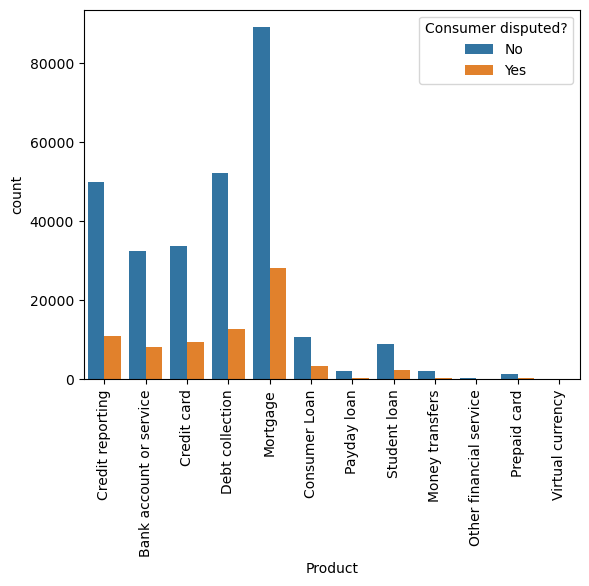

In [29]:
sns.countplot(x='Product', hue='Consumer disputed?', data=df_train)
plt.xticks(rotation=90)
plt.show()

## Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

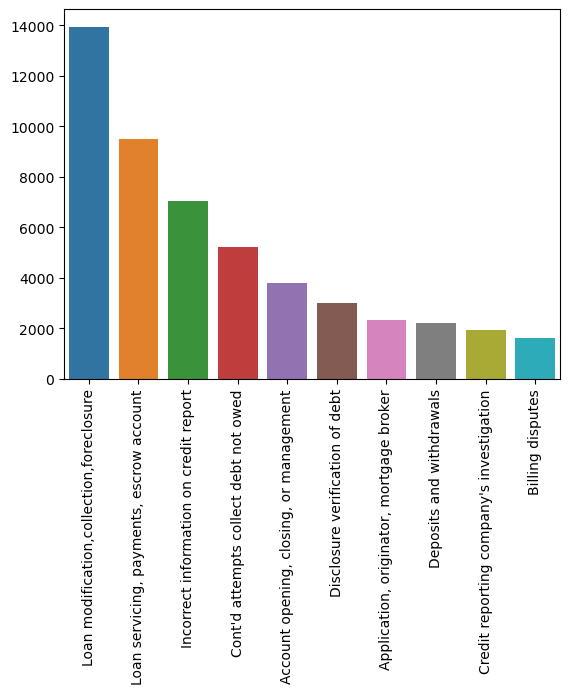

In [30]:
Top_Issues_disputed = disputed_cons['Issue'].value_counts().sort_values(ascending=False).head(10)
#Top_Issues_disputed
sns.barplot(x = Top_Issues_disputed.index, y = Top_Issues_disputed.values)
plt.xticks(rotation=90)
plt.show()

## Plot bar graph for the total no of disputes by State with Maximum Disputes

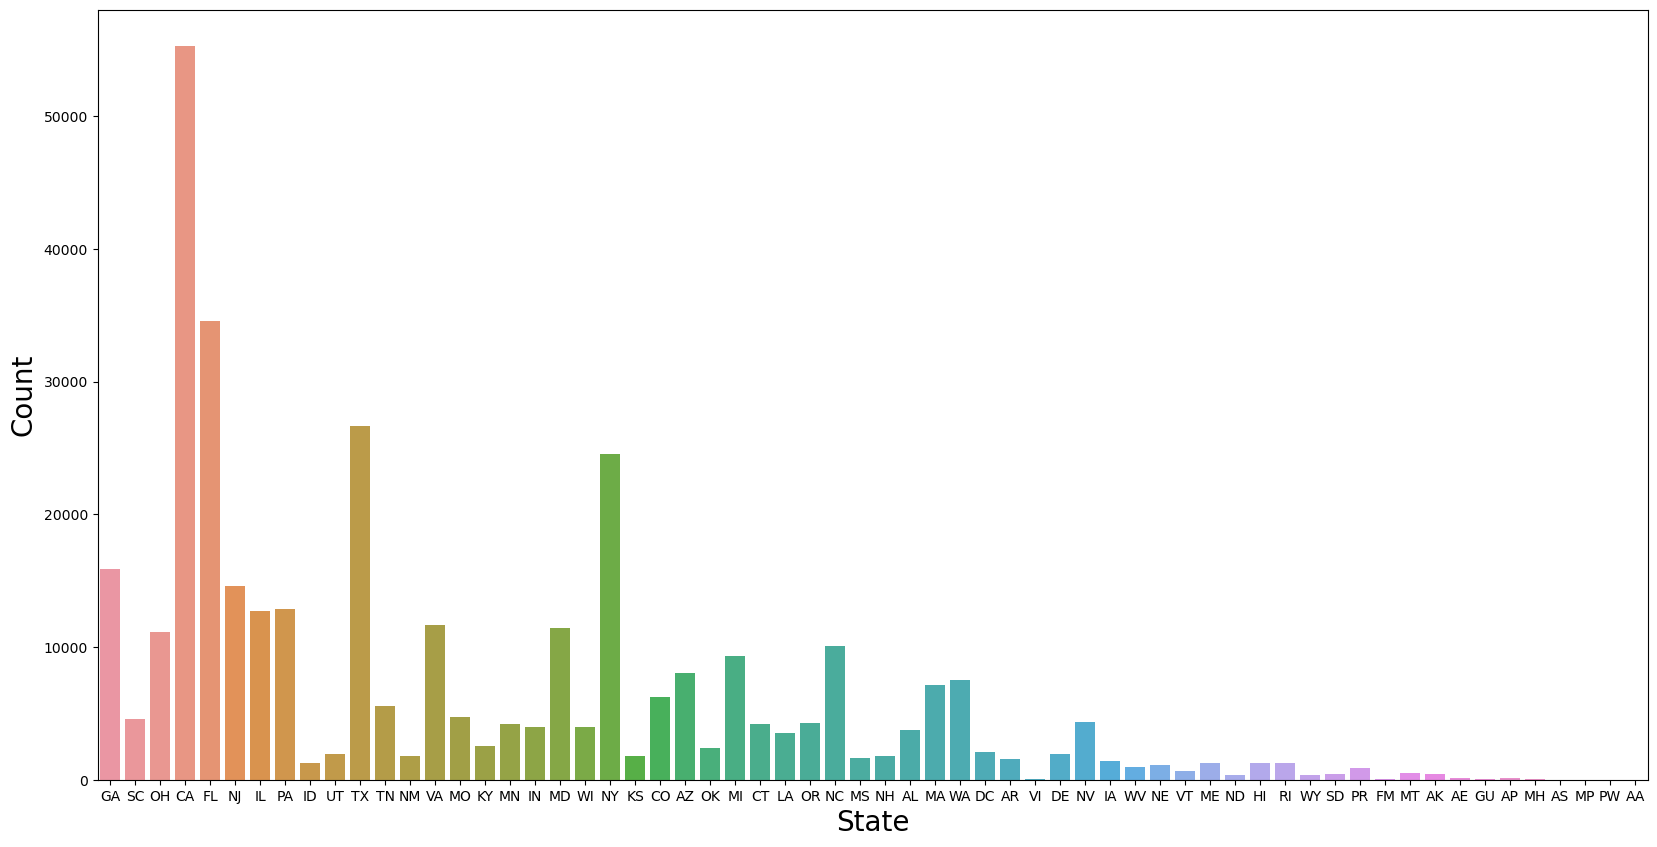

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_train['State'])
plt.xlabel('State', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

    These are Top 10 observations:
    CA is having 15% of disputes
    CA and FL are having around 25% of disputes
    CA, FL and TX are having around 32% disputes
    CA, FL, TX and NY are having around 38% disputes
    CA, FL, TX, NY and GA are having around 43% disputes
    CA, FL, TX, NY, GA and NJ are having around 47% disputes
    CA, FL, TX, NY, GA, NJ and PA are having around 50% disputes
    CA, FL, TX, NY, GA, NJ, PA and IL are having around 54% disputes
    CA, FL, TX, NY, GA, NJ, PA, IL and VA are having around 57% disputes
    CA, FL, TX, NY, GA, NJ, PA, IL, VA and MD are having around 61% disputes and so on.

#percentage_dispute_statewise = df_train['State'].value_counts()/len(df_train['State'])*100
#percentage_dispute_statewise.head(10)

## Plot bar graph for the total no of disputes by Submitted Via diffrent source 

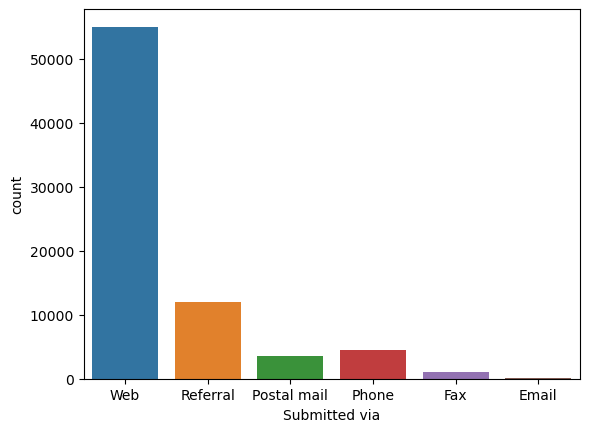

In [32]:
sns.countplot(x='Submitted via', data=disputed_cons)
plt.show()

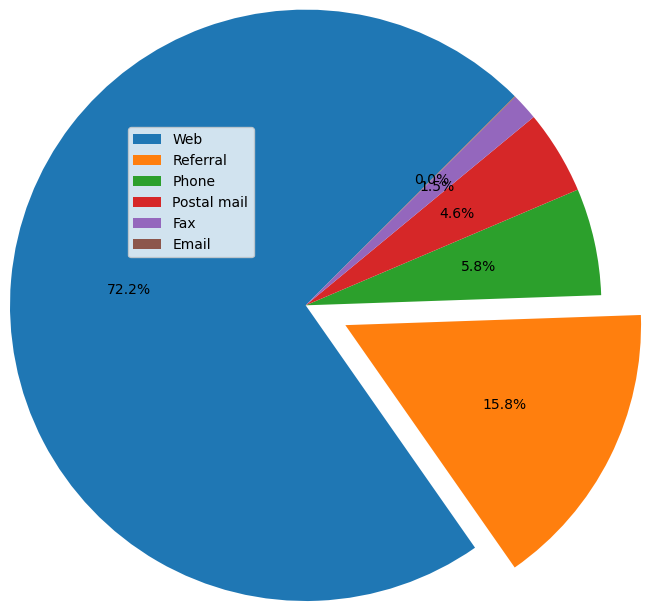

In [33]:
## Pie chart for visualization of percentage of total no. of disputes by Submitted via different source/medium:
values = disputed_cons['Submitted via'].value_counts().values
medium = disputed_cons['Submitted via'].value_counts().index
ex = [0,0.3,0,0,0,0]
plt.pie(values, autopct='%0.1f%%', explode=ex,
        radius=2, startangle=45)
plt.legend(medium)
plt.show()

    We observed that 72% of disputes were submitted only via Web portal
    and 88% of disputes via both Web portal and Referral.

#Total_disputes_source = disputed_cons['Submitted via'].value_counts()/len(disputed_cons)*100
#Total_disputes_source

## Plot bar graph for the total no of disputes where Company's Response to the Complaints

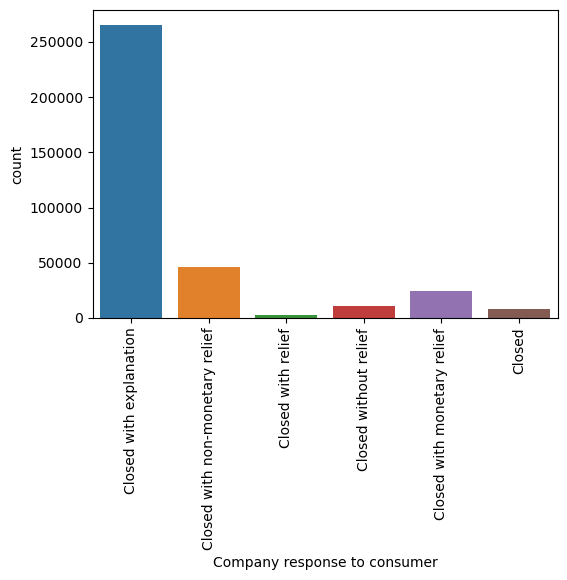

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='Company response to consumer', data=df_train)
plt.xticks(rotation=90)
plt.show()

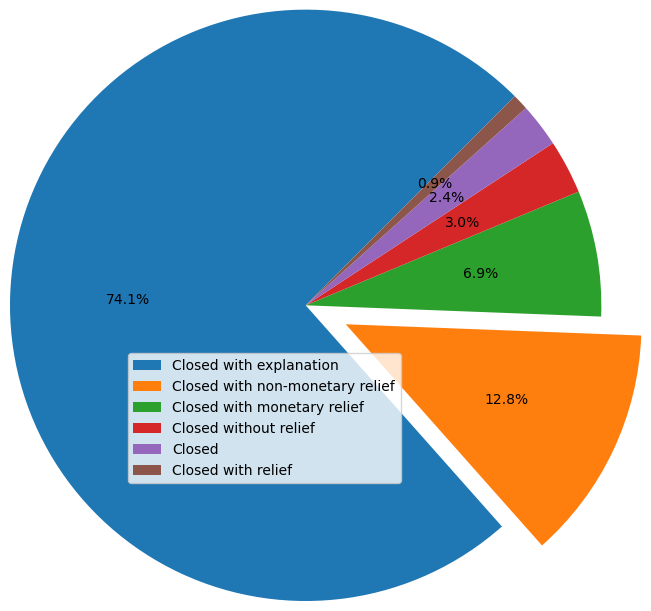

In [35]:
## Pie chart for visualization of percentage of total no. of disputes where Company's Response to the Complaints:
values = df_train['Company response to consumer'].value_counts().values
medium = df_train['Company response to consumer'].value_counts().index
ex = [0,0.3,0,0,0,0]
plt.pie(values, autopct='%0.1f%%', explode=ex,
        radius=2, startangle=45)
plt.legend(medium)
plt.show()
## This will be executed when we will give this a re-run...

    We observed that 74% of disputes were closed with explanation by the company.

#Total_response_train = df_train['Company response to consumer'].value_counts()/len(df_train)*100
#Total_response_train

## Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

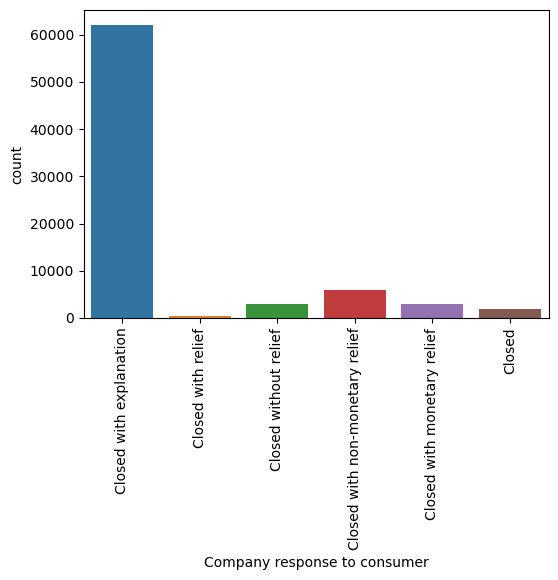

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='Company response to consumer', data=disputed_cons)
plt.xticks(rotation=90)
plt.show()

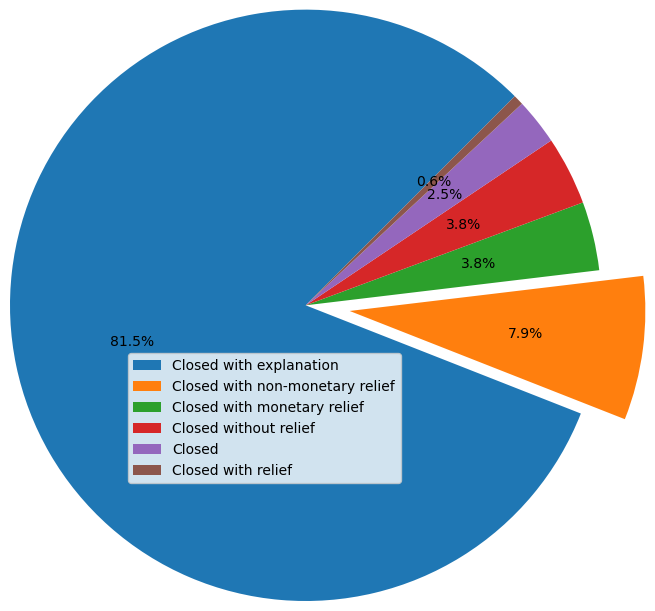

In [37]:
## Pie chart for visualization of percentage of total no. of disputes where Company's Response Leading to Disputes:
values = disputed_cons['Company response to consumer'].value_counts().values
medium = disputed_cons['Company response to consumer'].value_counts().index
ex = [0,0.3,0,0,0,0]
plt.pie(values, autopct='%0.1f%%', explode=ex,
        radius=2, startangle=45)
plt.legend(medium)
plt.show()

    We observed that 82% disputes were closed with explanation.
    And 90% disputed were closed either with explanation or non-monetary relief

total_response_cons = disputed_cons['Company response to consumer'].value_counts()/len(disputed_cons)*100
total_response_cons

## Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

Text(0.5, 0, 'Timely Response')

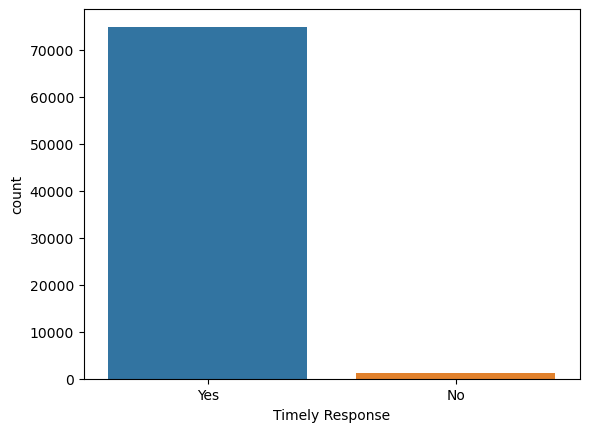

In [38]:
sns.countplot(x='Timely response?', data=disputed_cons)
plt.xlabel('Timely Response')

    We observed that 98% disputes were timely responded.

#timely_response = len(disputed_cons[disputed_cons['Timely response?']=='Yes'])/len(disputed_cons)*100
#timely_response

## Plot bar graph for the total no of disputes over Year Wise Complaints

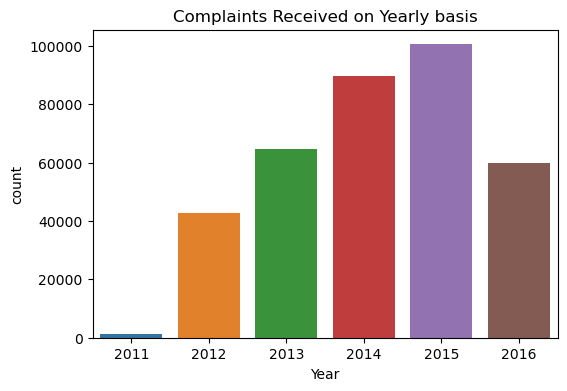

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Year Received', data=df_train)
plt.xlabel('Year')
plt.title('Complaints Received on Yearly basis')
plt.show()

    We observed 28% of complaints were received in 2015.
    53% complaints were received in 2014 & 2015.
    71% complaints were received in 2013 to 2015.
    88% complaints were received in 2013 to 2016.

#year_wise_disputes = df_train['Year Received'].value_counts()/len(df_train)*100
#year_wise_disputes

## Plot bar graph for the total no of disputes over Year Wise Disputes

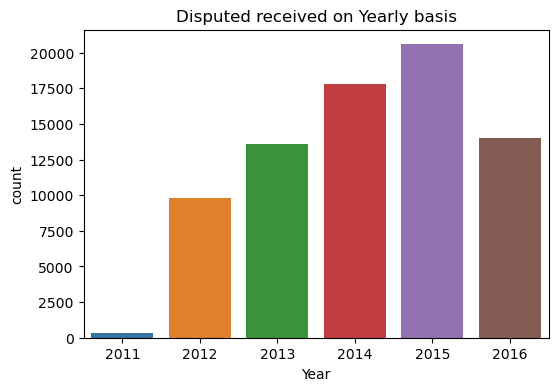

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Year Received', data=disputed_cons)
plt.xlabel('Year')
plt.title('Disputed received on Yearly basis')
plt.show()

    We observed that 27% of disputes were occured in 2015.
    50% disputes were occured in 2014 and 2015.
    68% disputed were occured in 2014 to 2016.
    86% disputed were occured in 2013 to 2016.<b>

#Year_disputes = disputed_cons['Year Received'].value_counts()/len(disputed_cons)*100
#Year_disputes

## Plot  bar graph for the top companies with highest complaints

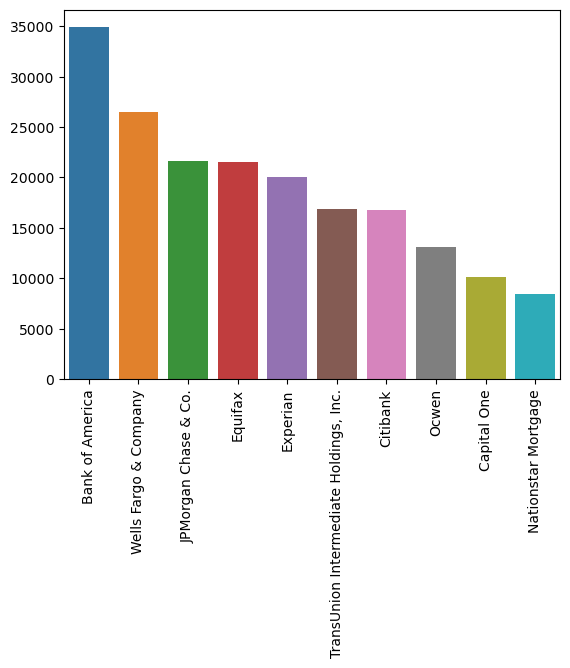

In [41]:
worst_companies_complaints = df_train['Company'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=worst_companies_complaints.index, y=worst_companies_complaints.values)
plt.xticks(rotation=90)
plt.show()

    We observed that 54% complaints were against these 10 companies.

#worst_company_percent = df_train['Company'].value_counts()/len(df_train)*100
#worst_company_percent.head(10)

## "Days Held" Column Analysis(describe)

In [42]:
df_train['Days Held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days Held, dtype: float64

In [43]:
df_test['Days Held'].describe()

count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days Held, dtype: float64

## Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [44]:
#len(df_train[df_train['Days Held']==-1])
#len(df_train[df_train['Days Held']==-1])
df_train['Days Held'] = df_train['Days Held'].replace(-1,0)
df_test['Days Held'] = df_test['Days Held'].replace(-1,0)

## Drop Days Held with Negative Values

In [45]:
df_train = df_train.drop('Days Held', axis=1)
df_test = df_test.drop('Days Held', axis=1)

df_train.columns

## Text pre-processing
    (It will be cover in upcoming calsses)

In [46]:
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower())) #make words in lower case
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = [] #for storing sentences without punctuation
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x)) #applying created function
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
#checking words with words present in english library above
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [47]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

##    Drop Unnecessary Columns for the Model Building<br> like:'Company', 'State', 'Year_Received', 'Days_held'

In [48]:
drop_columns = ['Company', 'State', 'Year Received']
df_train = df_train.drop(drop_columns, axis=1)
df_test = df_test.drop(drop_columns, axis=1)

In [49]:
df_train.columns
#df_test.columns

Index(['Product', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Month Received',
       'Week Received', 'Issues_cleaned'],
      dtype='object')

## Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [50]:
df_train['Consumer disputed?'] = df_train['Consumer disputed?'].replace('Yes', 1)
df_train['Consumer disputed?'] = df_train['Consumer disputed?'].replace('No', 0)

## Create Dummy Variables for catagorical features like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [51]:
dummy_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dummy_cols], prefix_sep = '_', drop_first=True)
df_test_dummies = pd.get_dummies(df_test[dummy_cols], prefix_sep = '_', drop_first=True)

## Concate Dummy Variables and Drop the Original Columns

In [52]:
df_train = df_train.drop(dummy_cols, axis=1)
df_test = df_test.drop(dummy_cols, axis=1)
df_train = pd.concat([df_train, df_train_dummies], axis=1)
df_test = pd.concat([df_test, df_test_dummies], axis=1)

## Calculating TF-IDF

In [53]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


## Replacing Issues_cleaned by Vectorized Issues

In [54]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

## Observe train and test datasets

In [55]:
df_train.head()

,Consumer disputed?,Month Received,Week Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,2,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,4,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,12,3,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,1,0,0,0,1,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,1,4,0,0,0,1,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [56]:
df_test.head()

,Month Received,Week Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,4,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,9,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,5,3,1,0,0,0,0,0,0,0,...,0.0,0.0,0.406735,0.0,0.0,0.0,0.0,0.413484,0.0,0
4,7,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


## Observe Shape of new Train and Test Datasets

In [57]:
df_train.shape

(358810, 193)

In [58]:
df_test.shape

(119606, 192)

## Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [59]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('Consumer disputed?', axis=1)), columns=[df_test.columns])
#df_train_scaled.head(2)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns=[df_test.columns])
#df_test_scaled.head(2)

## Do feature selection with help of PCA

In [60]:
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC'+ str(i+1))
#pca_columns
pca = PCA()
pca.fit(df_train_scaled)
pca_df_train_scaled = pd.DataFrame(pca.transform(df_train_scaled), columns=pca_columns) #storing pca values
#pca_df_train_scaled.head(2)

#storing explained_variance_ratio
explained_var_train = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Ratio']) 
#explained_var_train.head(2)

In [61]:
imp = []
for im in range(explained_var_train.shape[0]):
    imp.append(explained_var_train.head(im).sum()) #storing variance ratio and taking sum in each iteration
explained_imp_df = pd.DataFrame() #new df
explained_imp_df['Variable'] = pca_columns #new columns
explained_imp_df['Importance'] = imp # storing values of imp
explained_imp_df.head(55)

,Variable,Importance
0,PC1,Explained Ratio 0.0 dtype: float64
1,PC2,Explained Ratio 0.035882 dtype: float64
2,PC3,Explained Ratio 0.069329 dtype: float64
3,PC4,Explained Ratio 0.10149 dtype: float64
4,PC5,Explained Ratio 0.128148 dtype: float64
5,PC6,Explained Ratio 0.153022 dtype: float64
6,PC7,Explained Ratio 0.177157 dtype: float64
7,PC8,Explained Ratio 0.199399 dtype: float64
8,PC9,Explained Ratio 0.221115 dtype: float64
9,PC10,Explained Ratio 0.242562 dtype: float64


df_train_scaled.shape[1]
explained_var_train.shape[0]

## Select top features which are covering 80% of the information <br> (n=53), <br> store this data into new dataframe,

In [62]:
pca_cols = []
for i in range(53):
    pca_cols.append('PC'+str(i+1))
#pca_cols

#after feature selection using pca we get 53 as optimal no. of features giving 80% information
pca_model = PCA(n_components=53) 
pca_model.fit(df_train_scaled)
df_pca_train_scaled = pd.DataFrame(pca_model.transform(df_train_scaled), columns=[pca_cols])
df_pca_train_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,5.356832,-2.269660,-1.152894,-1.027763,0.162049,-0.915659,-0.481325,0.337981,0.085670,-0.100740,...,-0.183532,-0.133732,0.605142,0.151863,-0.416775,0.325779,0.649880,0.608786,0.251385,-0.231424
1,-0.147019,0.019750,-0.053033,0.799072,-0.439569,-0.153179,1.477217,-0.277420,-0.866861,0.110363,...,-0.130495,-0.159439,0.519020,-0.147283,-0.179858,0.321043,1.779370,1.324193,0.725761,0.288350
2,0.157736,-0.003591,-0.005469,0.810187,-0.614172,0.027217,1.094387,0.108553,-1.049959,0.088809,...,-0.161571,0.626763,-1.195831,1.745045,0.775802,-1.357018,-1.959353,-1.786283,-2.184607,1.311332
3,-0.817893,-0.911930,3.535448,0.336095,-0.903438,-0.164738,-0.588499,-1.258113,0.288441,-0.153515,...,0.136365,-0.075091,0.246965,0.026494,-0.451271,-0.300147,-0.918495,-0.700353,-0.156654,-0.078360
4,-0.509788,-1.051547,3.915086,0.487240,-0.841669,-0.060788,-0.677642,-1.392642,0.720134,-0.292129,...,0.092108,-0.038437,0.158554,-0.086464,-0.010383,0.111698,0.911712,0.433897,0.344212,-0.070964


In [63]:
# Same process will be applied for testing set:
pca_cols = []
for i in range(53):
    pca_cols.append('PC'+str(i+1))
#pca_cols

#after feature selection using pca we get 53 as optimal no. of features giving 80% information
pca_model = PCA(n_components=53) 
pca_model.fit(df_test_scaled)
df_pca_test_scaled = pd.DataFrame(pca_model.transform(df_test_scaled), columns=[pca_cols])
df_pca_test_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,-0.129947,0.380962,-0.245832,1.356882,-1.034205,-0.135559,1.260035,0.374848,-1.044314,-0.420885,...,1.849765,-0.609695,1.489495,2.349230,1.219886,-1.616181,-0.608802,-1.468230,0.338300,-2.304283
1,0.922740,1.553537,0.766315,0.347336,1.320100,4.126013,1.091300,2.546543,2.733651,0.706493,...,0.319863,-0.637109,2.548839,-1.543811,-6.421269,-1.500786,-2.030487,8.211776,5.432861,-3.230106
2,0.816302,-0.289903,-0.106628,1.441975,-0.726447,0.391121,1.694272,0.190084,-1.599184,0.681838,...,-0.030845,-0.119157,-0.402986,0.925550,-0.234642,0.474535,-1.305131,0.111991,-0.504204,0.048426
3,4.956151,12.125706,2.013934,-2.461562,6.552229,10.517943,-0.181321,-1.316012,0.388244,-0.302482,...,0.022906,0.618996,1.688918,0.276857,2.461409,-0.456220,-0.182082,0.239915,0.382800,0.035528
4,-0.054881,-0.565640,3.331671,4.384195,-2.562887,0.321561,-3.155153,-5.840520,3.966412,2.825198,...,0.063599,0.113642,-0.253411,-0.081716,-0.320277,0.007330,0.085600,-0.017693,-0.106461,-0.011842


## Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)

In [64]:
X = df_pca_train_scaled
Y = df_train['Consumer disputed?']

In [65]:
print(X.shape)
print(Y.shape)

(358810, 53)
(358810,)


## Split data into Train and Test datasets<br>(for test data use test excel file data)

In [66]:
X_train, X_train_val, Y_train, Y_train_val = train_test_split(X, Y, test_size=0.3) #splitting data into 70%-30% ratio
X_test = df_pca_test_scaled

## Shapes of the datasets

In [67]:
X_train.shape, X_train_val.shape, Y_train.shape, Y_train_val.shape, X_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier
 

In [68]:
Models = [LogisticRegression(), DecisionTreeClassifier(),
          RandomForestClassifier(), AdaBoostClassifier(),
          GradientBoostingClassifier(), KNeighborsClassifier(),
          XGBClassifier()]
model_name = []
accuracy_train = []
accuracy_val = []
for model in Models:
    model.fit(X_train, Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_train_val)
    model_name.append(type(model).__name__)
    accuracy_train.append(accuracy_score(Y_train, y_pred_train))
    accuracy_val.append(accuracy_score(Y_train_val, y_pred_val))

data_df = {'Model names':model_name, 'Training Accuracy':accuracy_train, 'Validation Accuracy': accuracy_val}
data_df = pd.DataFrame(data_df)
data_df['Difference'] = ((np.abs(data_df['Training Accuracy'] - data_df['Validation Accuracy'])) *100)/(data_df['Training Accuracy']) 
data_df.sort_values(by = 'Validation Accuracy', ascending = False)

,Model names,Training Accuracy,Validation Accuracy,Difference
0,LogisticRegression,0.788213,0.786544,0.211645
3,AdaBoostClassifier,0.788209,0.786544,0.211141
4,GradientBoostingClassifier,0.788240,0.786535,0.216352
6,XGBClassifier,0.788858,0.786377,0.314432
2,RandomForestClassifier,0.801021,0.774663,3.290588
1,DecisionTreeClassifier,0.801033,0.774588,3.301308
5,KNeighborsClassifier,0.763731,0.748948,1.935628


#### <i> As per output, we can determine that Logistic Regression model will be the best model to take in consideration for this dataset. <i>

## Final Model and Prediction for test data file

In [69]:
Lr = LogisticRegression()
Lr.fit(X_train, Y_train)
Y_prediction_test = Lr.predict(X_test)
Prediction = pd.DataFrame(Y_prediction_test, columns=['Predictions'])
Prediction.head()

,Predictions
0,0
1,1
2,0
3,0
4,0


## Export Predictions to CSV

In [70]:
Prediction.to_csv('Predictions_test.csv')